## Chicago Taxi Rides 2016

<img src="images.jpeg">

La practica consiste en realiza una breve limpieza al dataset de los viajes de taxi realizaron en 2016 en la ciudad de chicago, descargada de https://www.kaggle.com/chicago/chicago-taxi-rides-2016

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None #silence

In [2]:
df = pd.read_csv("chicago_taxi_trips_2016_01.csv")
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.40,NaN,NaN,24.0,24.0,4.50,0.00,0.0,0.0,4.50,Cash,107.0,199.0,510.0,199.0,510.0
1,2776.0,2016-1-22 09:30:00,2016-1-22 09:45:00,240.0,0.70,NaN,NaN,NaN,NaN,4.45,4.45,0.0,0.0,8.90,Credit Card,NaN,NaN,NaN,NaN,NaN
2,3168.0,2016-1-31 21:30:00,2016-1-31 21:30:00,0.0,0.00,NaN,NaN,NaN,NaN,42.75,5.00,0.0,0.0,47.75,Credit Card,119.0,NaN,NaN,NaN,NaN
3,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.10,NaN,NaN,6.0,6.0,7.00,0.00,0.0,0.0,7.00,Cash,NaN,686.0,500.0,686.0,500.0
4,5710.0,2016-1-14 05:45:00,2016-1-14 06:00:00,480.0,2.71,NaN,NaN,32.0,NaN,10.25,0.00,0.0,0.0,10.25,Cash,NaN,385.0,478.0,NaN,NaN


In [3]:
print(df.shape)
print(df.dtypes)

(1705805, 20)
taxi_id                   float64
trip_start_timestamp       object
trip_end_timestamp         object
trip_seconds              float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
pickup_community_area     float64
dropoff_community_area    float64
fare                      float64
tips                      float64
tolls                     float64
extras                    float64
trip_total                float64
payment_type               object
company                   float64
pickup_latitude           float64
pickup_longitude          float64
dropoff_latitude          float64
dropoff_longitude         float64
dtype: object


In [4]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['taxi_id' 'trip_seconds' 'trip_miles' 'pickup_census_tract'
 'dropoff_census_tract' 'pickup_community_area' 'dropoff_community_area'
 'fare' 'tips' 'tolls' 'extras' 'trip_total' 'company' 'pickup_latitude'
 'pickup_longitude' 'dropoff_latitude' 'dropoff_longitude']


In [5]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['trip_start_timestamp' 'trip_end_timestamp' 'payment_type']


### Datos faltantes 

#### Técnica #1: mapa de calor de los datos faltantes

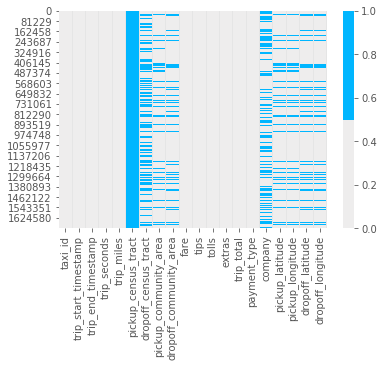

In [6]:
cols = df.columns
colours = ['#EEEDED', '#00B6FF']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

#### Técnica #2: Lista de porcentaje de datos faltantes 

In [10]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if (pct_missing > 0):
        print('{} - {}%'.format(col, round(pct_missing*100,3)))

taxi_id - 0.001%
trip_end_timestamp - 0.007%
trip_seconds - 0.018%
trip_miles - 0.001%
pickup_census_tract - 100.0%
dropoff_census_tract - 43.283%
pickup_community_area - 16.754%
dropoff_community_area - 18.388%
fare - 0.002%
tips - 0.002%
tolls - 0.002%
extras - 0.002%
trip_total - 0.002%
company - 37.093%
pickup_latitude - 16.752%
pickup_longitude - 16.752%
dropoff_latitude - 18.272%
dropoff_longitude - 18.272%


#### Técnica #3: Histograma de datos faltantes

In [8]:
aux = df.copy()

created missing indicator for: taxi_id
created missing indicator for: trip_end_timestamp
created missing indicator for: trip_seconds
created missing indicator for: trip_miles
created missing indicator for: pickup_census_tract
created missing indicator for: dropoff_census_tract
created missing indicator for: pickup_community_area
created missing indicator for: dropoff_community_area
created missing indicator for: fare
created missing indicator for: tips
created missing indicator for: tolls
created missing indicator for: extras
created missing indicator for: trip_total
created missing indicator for: company
created missing indicator for: pickup_latitude
created missing indicator for: pickup_longitude
created missing indicator for: dropoff_latitude
created missing indicator for: dropoff_longitude


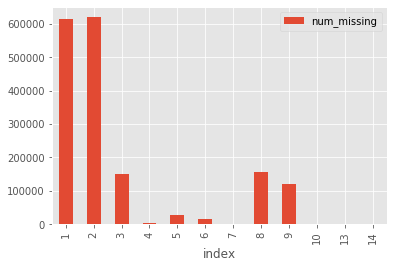

In [11]:
for col in aux.columns:
    missing = aux[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        aux['{}_ismissing'.format(col)] = missing
        
# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in aux.columns if 'ismissing' in col]
aux['num_missing'] = aux[ismissing_cols].sum(axis=1)

aux['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

con lo que podemos observar que 1,200,000 observaciones tienen por lo menos uno o dos datos faltantes

### Analisis de las caracteristicas

#### Técnica #1: Histograma y Box Plot

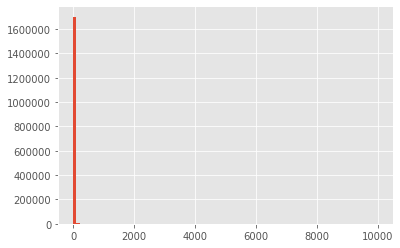

In [12]:
df['trip_total'].hist(bins=100)

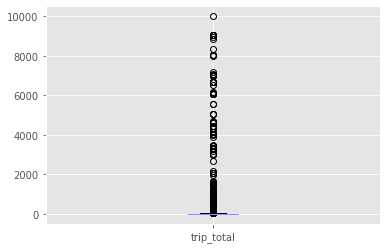

In [13]:
df.boxplot(column=['trip_total'])

#### Técnica #2: Estadistica descriptiva

In [14]:
df['trip_total'].describe()

count    1.705772e+06
mean     1.562189e+01
std      4.272208e+01
min      0.000000e+00
25%      7.000000e+00
50%      9.500000e+00
75%      1.530000e+01
max      9.997160e+03
Name: trip_total, dtype: float64

#### Técnica #3: Gráfico de barras

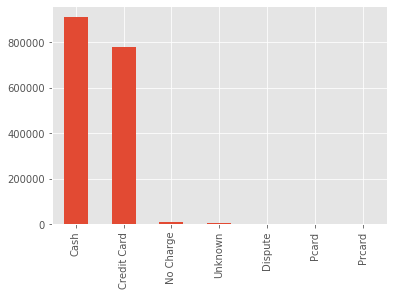

In [17]:
df['payment_type'].value_counts().plot.bar()

### Datos innecesarios

#### Tipo innecesario #1: Desinformativo / Repetitivo

In [22]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

pickup_census_tract: 100.00000%
NaN    1705805
Name: pickup_census_tract, dtype: int64

tolls: 99.93276%
0.00     1704658
1.50         234
1.90         232
2.00         162
3.00          98
          ...   
17.50          1
5.25           1
18.00          1
18.25          1
5.40           1
Name: tolls, Length: 99, dtype: int64



como podemos ver pickup_census_tract es una caracteristica vacia y tolls en su mayoria tiene 0.00 pero en este caso es importante considerar que es una caracteristica que aporta mucho para determinar el trip_total

#### Tipo innecesario #2: Irrelevante

En este tipo de datos innecesario depende del problema que estamos tratando de resolver para decidir si una caracteristica es irrelevante o no

#### Tipo innecesario #3: Duplicados

##### Duplicados tipo #1: Todas las caracteristicas

In [23]:
df_dedupped = df.drop('taxi_id', axis=1).drop_duplicates()

print(df.shape)
print(df_dedupped.shape)

(1705805, 20)
(1686064, 19)


Como podemos observar este dataset coontiene un problema de datos duplicados de 19741 observaciones

##### Duplicados tipo #2: Características claves

Un taxi no deberia tener 2 observaciones con el mismo trip_start_timestamp

In [26]:
df.fillna(-999).groupby(['taxi_id','trip_start_timestamp'])['taxi_id'].count().sort_values(ascending=False).head(20)

taxi_id  trip_start_timestamp
6275.0   2016-1-4 10:30:00       212
3820.0   2016-1-22 06:15:00       71
4570.0   2016-1-30 08:15:00       61
557.0    2016-1-5 06:45:00        49
4634.0   2016-1-4 11:15:00        39
         2016-1-1 01:30:00        15
6537.0   2016-1-3 10:30:00        15
746.0    2016-1-15 12:45:00       11
3847.0   2016-1-26 09:30:00       11
684.0    2016-1-9 17:00:00        10
2878.0   2016-1-24 08:45:00       10
         2016-1-20 19:45:00       10
212.0    2016-1-10 19:30:00        9
3847.0   2016-1-25 13:00:00        9
8457.0   2016-1-19 00:00:00        9
631.0    2016-1-22 11:00:00        8
7492.0   2016-1-5 19:15:00         8
3646.0   2016-1-7 15:45:00         8
8175.0   2016-1-31 15:30:00        8
6743.0   2016-1-26 09:00:00        7
Name: taxi_id, dtype: int64

In [27]:
df_dedupped2 = df.drop_duplicates(subset=['taxi_id','trip_start_timestamp'])

print(df.shape)
print(df_dedupped2.shape)

(1705805, 20)
(1563752, 20)


con lo cual podemos observar que existen 142053 observaciones con duplicidad en estas dos llaves

### Datos inconsistentes

#### Tipo inconsitente #1: Capitalización

In [30]:
df['payment_type'].value_counts(dropna = False)

Cash           912334
Credit Card    781271
No Charge        7555
Unknown          3139
Dispute           845
Pcard             437
Prcard            224
Name: payment_type, dtype: int64

El uso inconsistente de las mayúsculas y minúsculas en los valores categóricos es un error común. Podría causar problemas ya que los análisis en Python son sensibles a las mayúsculas y minúsculas, pero en esta caracteristica se pude observar que no presenta este problema

#### Tipo inconsistente #2:Formatos

Otra estandarización que debemos realizar es la de los formatos de datos. Un ejemplo es convertir la característica trip_start_timestamp al formato DateTime.

In [31]:
df.trip_start_timestamp.value_counts()

2016-1-1 02:30:00     1837
2016-1-1 02:45:00     1821
2016-1-1 02:00:00     1786
2016-1-1 01:45:00     1763
2016-1-1 02:15:00     1750
                      ... 
2016-1-12 04:00:00      42
2016-1-26 04:15:00      42
2016-1-13 04:00:00      42
2016-1-20 04:00:00      40
2016-1-19 04:15:00      35
Name: trip_start_timestamp, Length: 2976, dtype: int64

In [32]:
df.trip_start_timestamp.describe()

count               1705805
unique                 2976
top       2016-1-1 02:30:00
freq                   1837
Name: trip_start_timestamp, dtype: object

In [35]:
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'], format='%Y-%m-%d')